# Project Assignment - Linear Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
#loading dataset
diabetes = load_diabetes()

#df
features = pd.DataFrame(diabetes.data,columns=diabetes.feature_names)
target = pd.DataFrame(diabetes.target,columns=['target'])
df = pd.concat([features,target],axis=1)
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


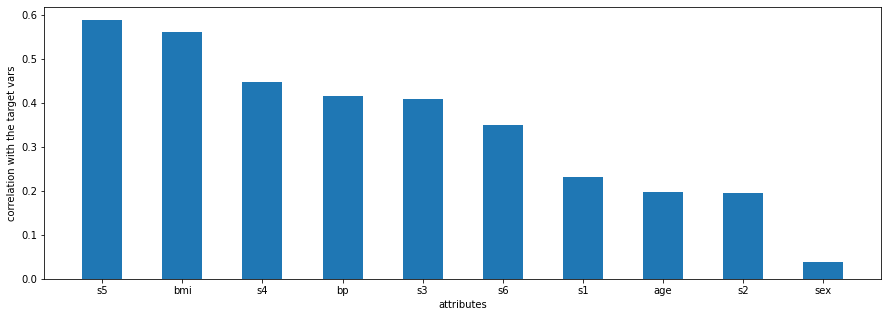

In [3]:
# corr
corrs = [abs(df.corr('spearman')[x]['target']) for x in features]
lst = list(zip(corrs, features))
lst.sort(key = lambda x : x[0], reverse =True)
corrs, labels = list(zip((*lst)))

index = np.arange(len(labels))
plt.figure(figsize=(15,5))
plt.bar(index, corrs, width=0.5)
plt.xlabel('attributes')
plt.ylabel('correlation with the target vars')
plt.xticks(index,labels)
plt.show()

In [4]:
#selecting attr with most corr with the target
x = df['s5'].values
y = df['target'].values

#scaling
x_scaler = MinMaxScaler()
x = x_scaler.fit_transform(x.reshape(-1,1))
x = x[:,-1]
y_scaler = MinMaxScaler()
y = y_scaler.fit_transform(y.reshape(-1,1))
y = y[:,-1]

In [5]:
#splitting the data
xtrain, xtest, ytrain, ytest = train_test_split(x, y , test_size=0.2, random_state=0)

In [6]:
#learning
def error(m, x, c, t):
    return sum(((m * x + c) - t) ** 2) * 1/(2 * x.size)

def update(m, x, c, t, learning_rate):
    grad_m = sum(2 * ((m * x + c) - t) * x)
    grad_c = sum(2 * ((m * x + c) - t))
    m = m - grad_m * learning_rate
    c = c - grad_c * learning_rate
    return m, c

def gradient_descent(init_m, init_c, x, t, learning_rate, iterations, error_threshold):
    m = init_m
    c = init_c
    error_values = list()
    mc_values = list()
    for i in range(iterations):
        e = error(m, x, c, t)
        if e < error_threshold:
            print('error less than the threshold. stopping gradient descent')
            break
        error_values.append(e)
        m, c = update(m, x, c, t, learning_rate)
        mc_values.append((m,c))
    return m, c, error_values, mc_values

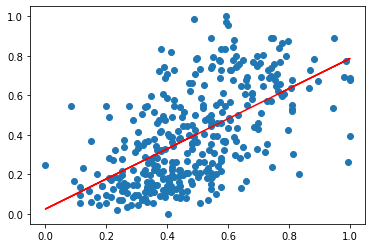

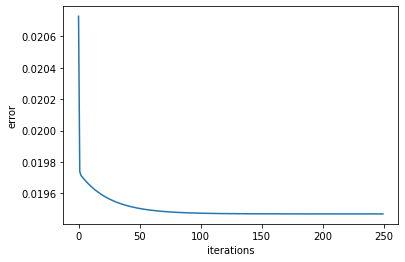

Wall time: 294 ms


In [7]:
%%time
init_m =0.9
init_c = 0
learning_rate = 0.001
iterations = 250
error_threshold = 0.001

m, c, error_values, mc_values = gradient_descent(init_m, init_c, xtrain, ytrain, learning_rate, iterations, error_threshold)
plt.scatter(xtrain, ytrain)
plt.plot(xtrain, (m * xtrain + c), c='r')
plt.show()
plt.plot(np.arange(len(error_values)),error_values)
plt.ylabel('error')
plt.xlabel('iterations')
plt.show()

In [8]:
#predction
pred = (m * xtest) + c

#err
mean_squared_error(ytest,pred)

0.03992393334062009

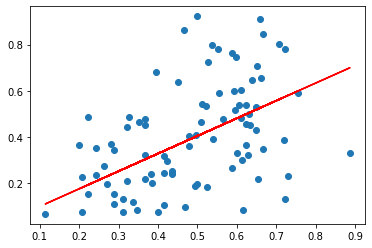

In [9]:
#predicted vals
plt.scatter(xtest,ytest)
plt.plot(xtest, pred,c='r')

In [10]:
#reshape to change the shape that is required by the scaler
pred = pred.reshape(-1,1)
xtest = xtest.reshape(-1,1)
ytest = ytest.reshape(-1,1)

xtest_scaled = x_scaler.inverse_transform(xtest)
ytest_scaled = y_scaler.inverse_transform(ytest)
pred_scaled = y_scaler.inverse_transform(pred)

#this is to remove the extra dimension
xtest_scaled = xtest_scaled[:,-1]
ytest_scaled = ytest_scaled[:,-1]
pred_scaled = pred_scaled[:,-1]

p = pd.DataFrame(list(zip(xtest_scaled,ytest_scaled,pred_scaled)),columns=['x','target_y','pred_y'])
p = p.round(decimals = 2)
p.head()

,x,target_y,pred_y
0,0.00,321.0,155.07
1,0.07,215.0,217.61
2,-0.02,127.0,134.53
3,-0.04,64.0,115.40
4,-0.03,175.0,119.10
